In [5]:
import glob
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

# -------- USER SETTINGS ----------
CALIB_DIR = "calib"

# inner corners (NOT squares). Example: a "7x5" board means (7,5) inner corners.
CHESSBOARD = (7, 7)

# Square size in meters (e.g. 20 mm = 0.020)
SQUARE_SIZE = 0.010



Left corners found: True, Right corners found: True


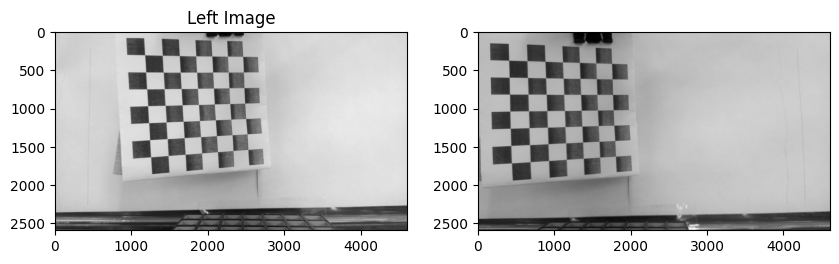

In [11]:
id=2
lp=f"calib/left_{id:02d}.png"
rp=f"calib/right_{id:02d}.png"
img_l = cv2.imread(lp, cv2.IMREAD_COLOR)
img_r = cv2.imread(rp, cv2.IMREAD_COLOR)

gray_l = cv2.cvtColor(img_l, cv2.COLOR_BGR2GRAY)
gray_r = cv2.cvtColor(img_r, cv2.COLOR_BGR2GRAY)

flags_find = cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_NORMALIZE_IMAGE
ret_l, corners_l = cv2.findChessboardCorners(gray_l, CHESSBOARD, flags_find)
ret_r, corners_r = cv2.findChessboardCorners(gray_r, CHESSBOARD, flags_find)
print(f"Left corners found: {ret_l}, Right corners found: {ret_r}")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(gray_l, cmap='gray')
plt.title('Left Image')
plt.subplot(1,2,2)
plt.imshow(gray_r, cmap='gray')


Left corners found: False, Right corners found: False
